In [12]:
import random
from sklearn.neighbors import NearestNeighbors
import numpy as np

In [13]:
class Smote(object):
    """
    SMOTE algorithm implementation.
    Parameters
    ----------
    samples : {array-like}, shape = [n_samples, n_features]
        Training vector, where n_samples in the number of samples and
        n_features is the number of features.
    N : int, optional (default = 50)
        Parameter N, the percentage of n_samples, affects the amount of final 
        synthetic samples，which calculated by floor(N/100)*T.
    k : int, optional (default = 5)
        Specify the number for NearestNeighbors algorithms.
        knn参数
    r : int, optional (default = 2)
        Parameter for sklearn.neighbors.NearestNeighbors API.When r = 1, this 
        is equivalent to using manhattan_distance (l1), and euclidean_distance 
        (l2) for r = 2. For arbitrary p, minkowski_distance (l_r) is used.
    Examples
    --------
      >>> samples = np.array([[3,1,2], [4,3,3], [1,3,4],
                              [3,3,2], [2,2,1], [1,4,3]])
      >>> smote = Smote(N=200)
      >>> synthetic_points = smote.fit(samples)
      >>> print(synthetic_points)
      [[3.31266454 1.62532908 2.31266454]
       [2.4178394  1.5821606  2.5821606 ]
       [3.354422   2.677211   2.354422  ]
       [2.4169074  2.2084537  1.4169074 ]
       [1.86018171 2.13981829 3.13981829]
       [3.68440949 3.         3.10519684]
       [2.22247957 3.         2.77752043]
       [2.3339721  2.3339721  1.3339721 ]
       [3.31504371 2.65752185 2.31504371]
       [2.54247589 2.54247589 1.54247589]
       [1.33577795 3.83211103 2.83211103]
       [3.85206355 3.04931215 3.        ]]
    """
    def __init__(self, N=50, k=5, r=2):
        # 初始化self.N, self.k, self.r, self.newindex
        self.N = N
        self.k = k
        # self.r是距离决定因子
        self.r = r
        # self.newindex用于记录SMOTE算法已合成的样本个数
        self.newindex = 0
        
    # 构建训练函数
    def fit(self, samples):
        # 初始化self.samples, self.T, self.numattrs
        self.samples = samples
        # self.T是少数类样本个数，self.numattrs是少数类样本的特征个数
        self.T, self.numattrs = self.samples.shape

        # 查看N%是否小于100%
        if(self.N < 100):
            # 如果是，随机抽取N*T/100个样本，作为新的少数类样本
            np.random.shuffle(self.samples)
            self.T = int(self.N*self.T/100)
            self.samples = self.samples[0:self.T,:]
            # N%变成100%
            self.N = 100

        # 查看从T是否不大于近邻数k
        if(self.T <= self.k):
            # 若是，k更新为T-1
            self.k = self.T - 1

        # 令N是100的倍数
        N = int(self.N/100)
        # 创建保存合成样本的数组
        self.synthetic = np.zeros((self.T * N, self.numattrs))

        # 调用并设置k近邻函数
        neighbors = NearestNeighbors(n_neighbors=self.k+1, 
                                     algorithm='ball_tree', 
                                     p=self.r).fit(self.samples)

        # 对所有输入样本做循环
        for i in range(len(self.samples)):
            # 调用kneighbors方法搜索k近邻
            nnarray = neighbors.kneighbors(self.samples[i].reshape((1,-1)),
                                           return_distance=False)[0][1:]

            # 把N,i,nnarray输入样本合成函数self.__populate
            self.__populate(N, i, nnarray)

        # 最后返回合成样本self.synthetic
        return self.synthetic
    
    # 构建合成样本函数
    def __populate(self, N, i, nnarray):
        # 按照倍数N做循环
        for j in range(N):
            # attrs用于保存合成样本的特征
            attrs = []
            # 随机抽取1～k之间的一个整数，即选择k近邻中的一个样本用于合成数据
            nn = random.randint(0, self.k-1)
            
            # 计算差值
            diff = self.samples[nnarray[nn]] - self.samples[i]
            # 随机生成一个0～1之间的数
            gap = random.uniform(0,1)
            # 合成的新样本放入数组self.synthetic
            self.synthetic[self.newindex] = self.samples[i] + gap*diff

            # self.newindex加1， 表示已合成的样本又多了1个
            self.newindex += 1

数据加载

In [14]:
import numpy as np 
import pandas as pd 

In [15]:
print('==> Preparing data..')
train_url = "E:\exercise_4\Kmeans/t_n_fequence_feature0328\SMOTE/n_1_fequence_feature_ -label.csv" 
names = ['feature0','feature1','feature2','feature3','feature4','feature5',
'feature6','feature7','feature8','feature9','feature10','feature11',
'feature12','feature13','feature14','feature15',
'feature16','feature17','class'] 
train_dataset = pd.read_csv(train_url, names=names)
train_array = train_dataset.values
x_train = train_array[:,0:18]
y_train = train_array[:,18]

==> Preparing data..


In [16]:
samples = x_train

In [17]:
samples

array([[-1.26106400e-03, -5.01073600e-03, -5.52621000e-04,
        -4.34071400e-03, -5.12000000e-05, -3.48188600e-03,
        -4.90536004e+00,  3.20570691e+00,  1.05363714e+01,
         2.07843943e+00,  1.16222924e+01,  3.82053233e+00,
         1.14965013e+02,  3.29576018e+01,  7.78129554e+01,
         3.18224164e+04,  3.22915433e+00,  1.32940091e+01],
       [ 1.16653100e-03,  6.69205800e-03,  3.89057480e-02,
         3.29165830e-02,  5.24922370e-02,  5.59086720e-02,
        -3.05183184e-01,  3.63994174e+00,  2.85465053e+00,
         3.54846669e+00,  2.87091735e+00,  5.08338389e+00,
         9.61021640e+01,  4.42709302e+01,  6.40520202e+01,
         2.56828570e+04,  3.68888023e+00,  1.68534842e+01],
       [ 1.29123000e-04, -1.82779800e-03,  2.18076220e-02,
         1.30501860e-02,  2.93111460e-02,  2.63540610e-02,
        -6.38400322e+00,  1.45579581e+00,  6.41837706e+00,
         1.23804596e+01,  9.05268254e+00,  1.24657579e+01,
         1.34846164e+02,  8.32934902e+01,  7.55561870e

In [18]:
smote = Smote(N=5000)
synthetic_points = smote.fit(samples)
print(synthetic_points)

[[-9.63449089e-04 -3.89545756e-03  3.96335075e-03 ...  3.28847904e+04
   3.16423118e+00  1.28544267e+01]
 [ 2.70845322e-04  2.37419403e-03  2.43471845e-02 ...  2.79481094e+04
   3.51925972e+00  1.55401800e+01]
 [ 4.83187604e-04  3.39784006e-03  2.77986169e-02 ...  2.74110807e+04
   3.55947205e+00  1.58515281e+01]
 ...
 [ 7.94536877e-04  4.61403488e-03  3.01511810e-02 ...  4.38254491e+04
   2.52237840e+00  8.86263708e+00]
 [ 2.16393729e-04  9.82361198e-04  2.55431005e-02 ...  4.42076620e+04
   2.51496216e+00  8.80749497e+00]
 [ 6.25985572e-04  4.04306675e-03  3.64467394e-02 ...  4.17472647e+04
   2.63575725e+00  9.47951150e+00]]


保存数据

In [19]:
n_1 = np.vstack((samples,synthetic_points))

In [20]:
np.savetxt('E:\exercise_4\Kmeans/t_n_fequence_feature0328\SMOTE/result/n_1_smote_fequence_feature.csv', n_1, delimiter = ',')

画图

In [21]:
from sklearn.manifold import TSNE 

#使用TSNE进行降维可视化操作 降为二维
tsne=TSNE(2) 
samples_plot =tsne.fit_transform(samples)
synthetic_points_plot =tsne.fit_transform(synthetic_points)

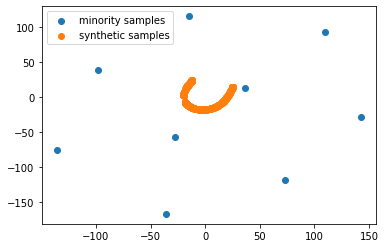

In [22]:
import matplotlib.pyplot as plt

plt.scatter(samples_plot[:,0], samples_plot[:,1])
plt.scatter(synthetic_points_plot[:,0], synthetic_points_plot[:,1])
plt.legend(["minority samples", "synthetic samples"])